<a href="https://colab.research.google.com/github/ErickFahesf/Oracle-Database-Scripts/blob/main/desafio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
from google.colab import drive
from google.colab import auth
from google.colab import files
import IPython
from IPython.display import Image
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/PROJETO/i2a2/sensor.csv')

# Verificar a quantidade de ocorrências de valores da coluna machine_status

df['machine_status'].value_counts()



NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [25]:
#Número de dias de em que os dados foram coletados.

df.index.max() - df.index.min()

220319

In [26]:
# Verificar se há valores nulos 
null_count= df.isnull().sum() # Contabilizar valores nulos
value_count=df.isnull().count()
missing_percentage=round(null_count/value_count *100, 1) # Para indicar o percentual de valores nulos
missing_df= pd.DataFrame({"Quantidade": null_count, "Percentual": missing_percentage})
print(missing_df)

                Quantidade  Percentual
Unnamed: 0               0         0.0
timestamp                0         0.0
sensor_00            10208         4.6
sensor_01              369         0.2
sensor_02               19         0.0
sensor_03               19         0.0
sensor_04               19         0.0
sensor_05               19         0.0
sensor_06             4798         2.2
sensor_07             5451         2.5
sensor_08             5107         2.3
sensor_09             4595         2.1
sensor_10               19         0.0
sensor_11               19         0.0
sensor_12               19         0.0
sensor_13               19         0.0
sensor_14               21         0.0
sensor_15           220320       100.0
sensor_16               31         0.0
sensor_17               46         0.0
sensor_18               46         0.0
sensor_19               16         0.0
sensor_20               16         0.0
sensor_21               16         0.0
sensor_22               4

In [27]:
df.drop(columns=['Unnamed: 0','sensor_01','sensor_06','sensor_07','sensor_08','sensor_09','sensor_15','sensor_30','sensor_50','sensor_51','sensor_00','sensor_15'],inplace=True)

In [28]:
# Verificar se há valores nulos 
null_count= df.isnull().sum() # Contabilizar valores nulos
value_count=df.isnull().count()
missing_percentage=round(null_count/value_count *100, 1) # Para indicar o percentual de valores nulos
missing_df= pd.DataFrame({"Quantidade": null_count, "Percentual": missing_percentage})
print(missing_df)

                Quantidade  Percentual
timestamp                0         0.0
sensor_02               19         0.0
sensor_03               19         0.0
sensor_04               19         0.0
sensor_05               19         0.0
sensor_10               19         0.0
sensor_11               19         0.0
sensor_12               19         0.0
sensor_13               19         0.0
sensor_14               21         0.0
sensor_16               31         0.0
sensor_17               46         0.0
sensor_18               46         0.0
sensor_19               16         0.0
sensor_20               16         0.0
sensor_21               16         0.0
sensor_22               41         0.0
sensor_23               16         0.0
sensor_24               16         0.0
sensor_25               36         0.0
sensor_26               20         0.0
sensor_27               16         0.0
sensor_28               16         0.0
sensor_29               72         0.0
sensor_31               1

In [29]:
# Converter timestamp para um objeto DatetimeIndex, que é necessário para análise de séries temporais em pandas
df.timestamp=pd.to_datetime(df.timestamp)

In [30]:
# Converter coluna machine_status para dado do tipo categorico.
df.machine_status=df.machine_status.astype('category')

In [31]:
# Transformar timestamp para o indice.
df.set_index('timestamp',inplace=True)

In [12]:
# Verificar se não há duplicação no indice. Essa verificação é importante porque, em uma análise de séries temporais, é essencial que os índices não contenham duplicatas, pois isso pode levar a problemas como perda de dados e imprecisão em cálculos de estatísticas descritivas e outras métricas
df.index.is_unique

True

In [14]:

# Transformar machine_status de string para tipo inteiro 
conditions = [(df['machine_status'] == 'NORMAL'), 
              (df['machine_status'] == 'BROKEN'), 
              (df['machine_status'] == 'RECOVERING')]
choices = [1, 0, 2] # Existem três condições possíveis
df['Operation'] = np.select(conditions, choices, default=0)

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabe

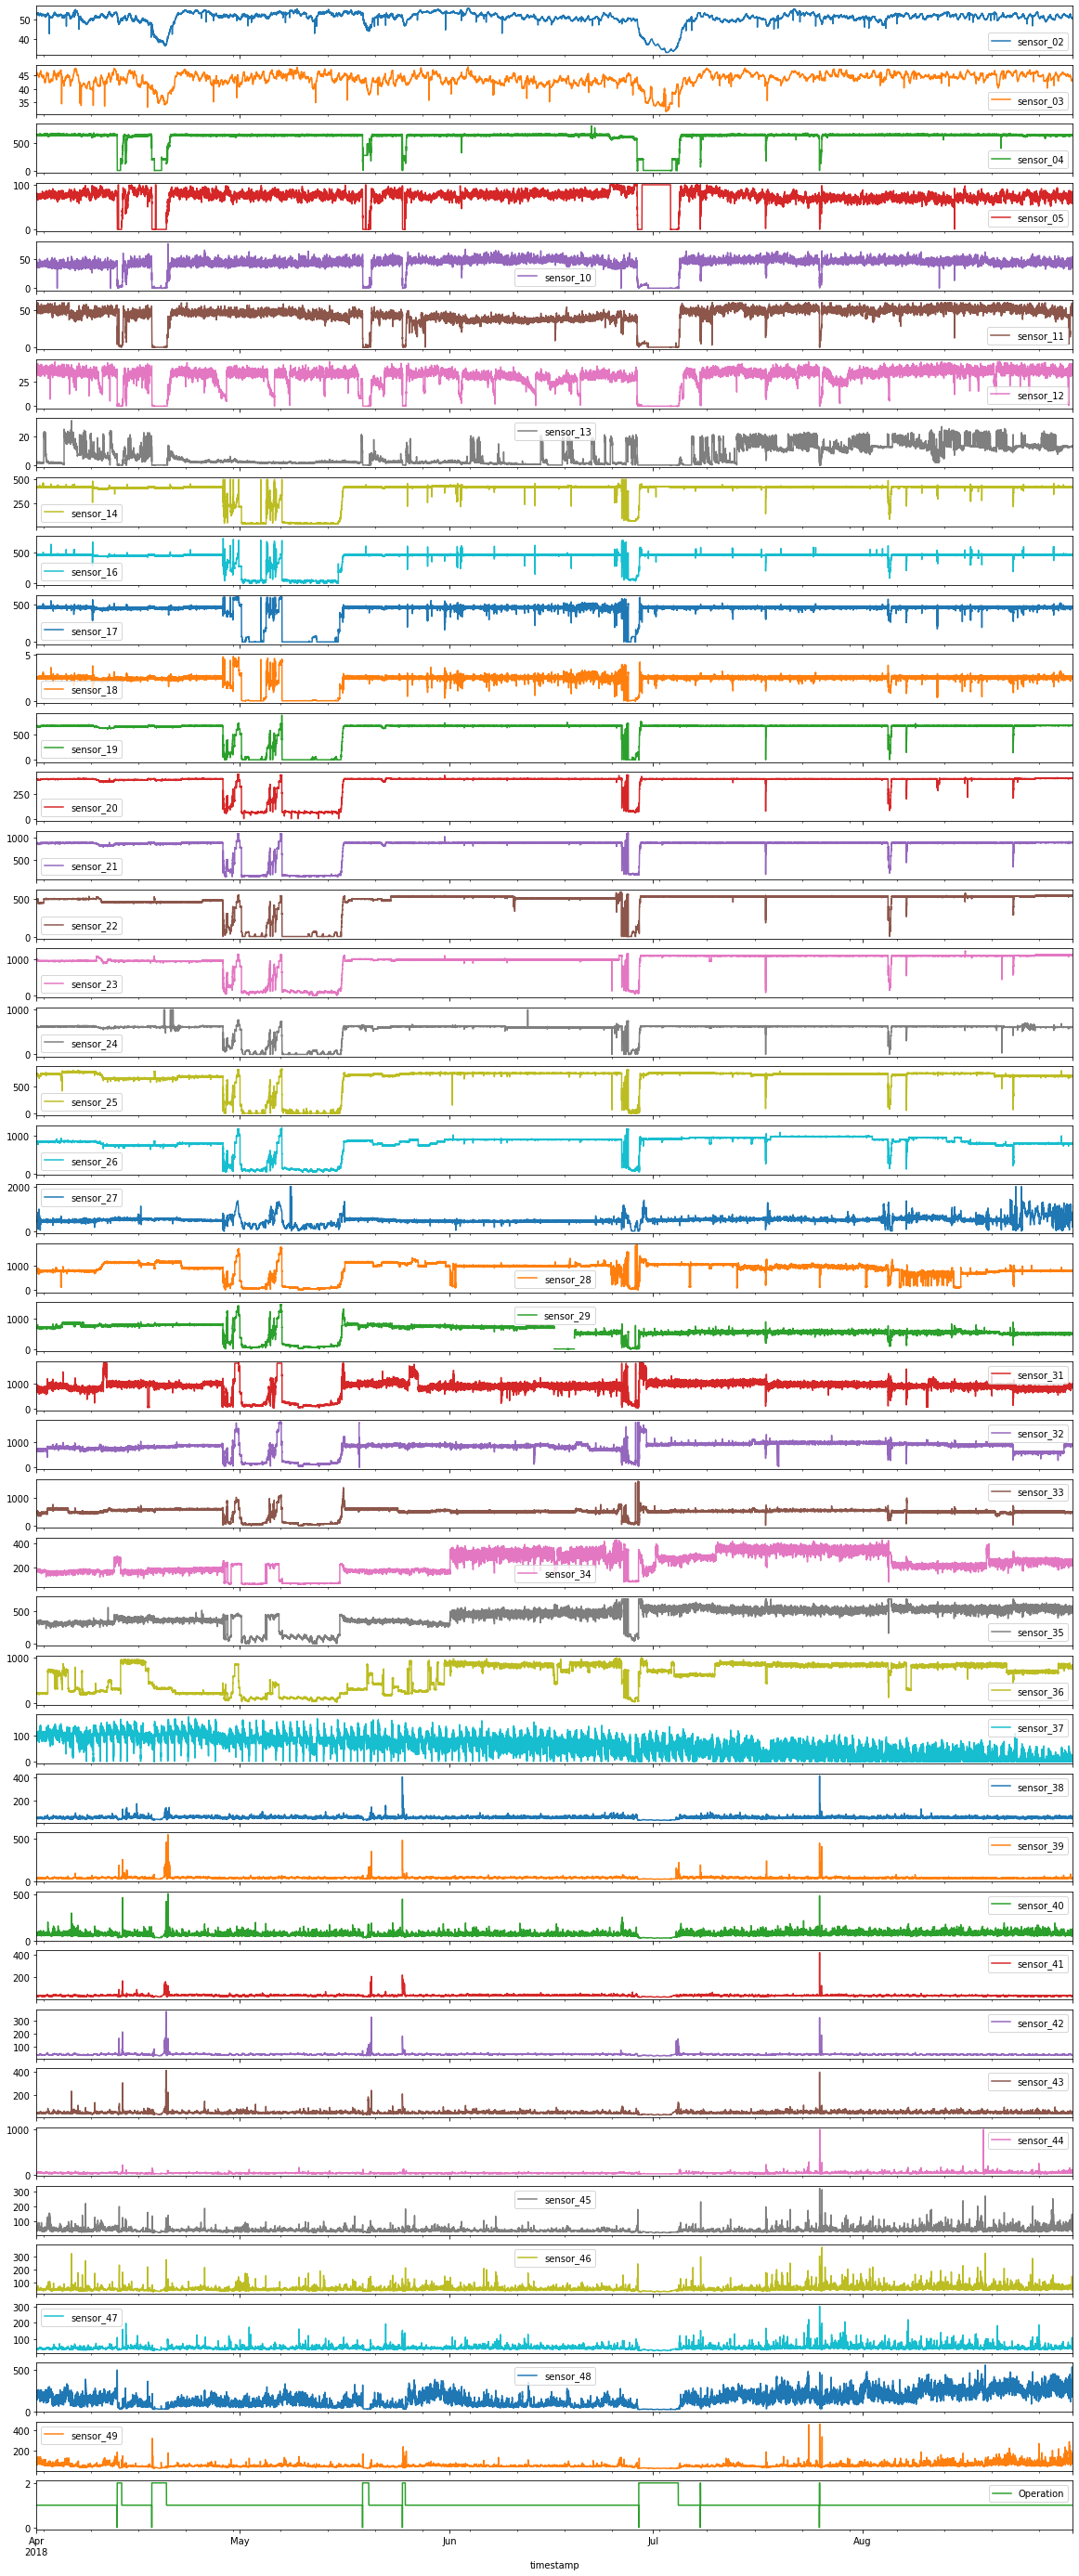

In [16]:
# Plotando os sensores
status = [(df['machine_status'] == 'NORMAL'), (df['machine_status'] == 'BROKEN'), (df['machine_status'] == 'RECOVERING')]
label_encoding = [1, 0, 2]
df['Operation'] = np.select(status, choices, default=0)
df.plot(subplots=True, sharex=True, figsize=(20, 50))